In [1]:
pip install numpy pandas seaborn category_encoders Jinja2 joblib streamlit ipykernel shap

You should consider upgrading via the '/Users/chiragthakkar/Documents/projects/Personal/predicitve_maintainence/predictive_maintenance/predicitve_maintenance/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import streamlit as st
import joblib
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("data/predictive_maintenance.csv")
df = df.drop(["UDI","Product ID"],axis=1)

df.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8571,L,297.9,308.6,2262,15.7,125,0,No Failure
2784,L,300.2,309.6,1430,52.7,47,0,No Failure
4527,M,302.4,310.5,1372,45.7,144,1,Heat Dissipation Failure
2232,L,299.5,308.6,1672,30.5,177,0,No Failure
2953,L,300.7,309.5,1578,35.4,34,0,No Failure


In [5]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ]

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [6]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
280,M,25.95,35.95,1456,43.7,80,0,No Failure,10.0
3202,L,28.05,37.05,1430,43.4,24,0,No Failure,9.0
548,L,25.25,37.15,1332,53.2,115,0,No Failure,11.9
5894,L,29.05,38.75,1597,37.9,164,0,No Failure,9.7
614,M,25.85,37.75,1445,45.2,55,0,No Failure,11.9


In [7]:
display(df.shape)

(10000, 9)

In [8]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts())
    print("****"*8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


Feature Selection

In [9]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5
2,2,25.95,36.35,1498,49.4,5,0,1,10.4
3,2,26.05,36.45,1433,39.5,7,0,1,10.4
4,2,26.05,36.55,1408,40.0,9,0,1,10.5


In [10]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [11]:
df['Failure Type'].value_counts()

Failure Type
0    9652
5     112
1      95
3      78
2      45
4      18
Name: count, dtype: int64

In [12]:
df

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,0,10.5
1,2,26.05,36.55,1408,46.3,3,0,0,10.5
2,2,25.95,36.35,1498,49.4,5,0,0,10.4
3,2,26.05,36.45,1433,39.5,7,0,0,10.4
4,2,26.05,36.55,1408,40.0,9,0,0,10.5
...,...,...,...,...,...,...,...,...,...
9995,1,26.65,36.25,1604,29.5,14,0,0,9.6
9996,3,26.75,36.25,1632,31.8,17,0,0,9.5
9997,1,26.85,36.45,1645,33.4,22,0,0,9.6
9998,3,26.85,36.55,1408,48.5,25,0,0,9.7


In [13]:
joblib.dump(scaler,'models/scaler.joblib')

['models/scaler.joblib']

In [14]:
X = df.drop(columns=["Failure Type", "Target"] , axis=1)
y = df["Failure Type"]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

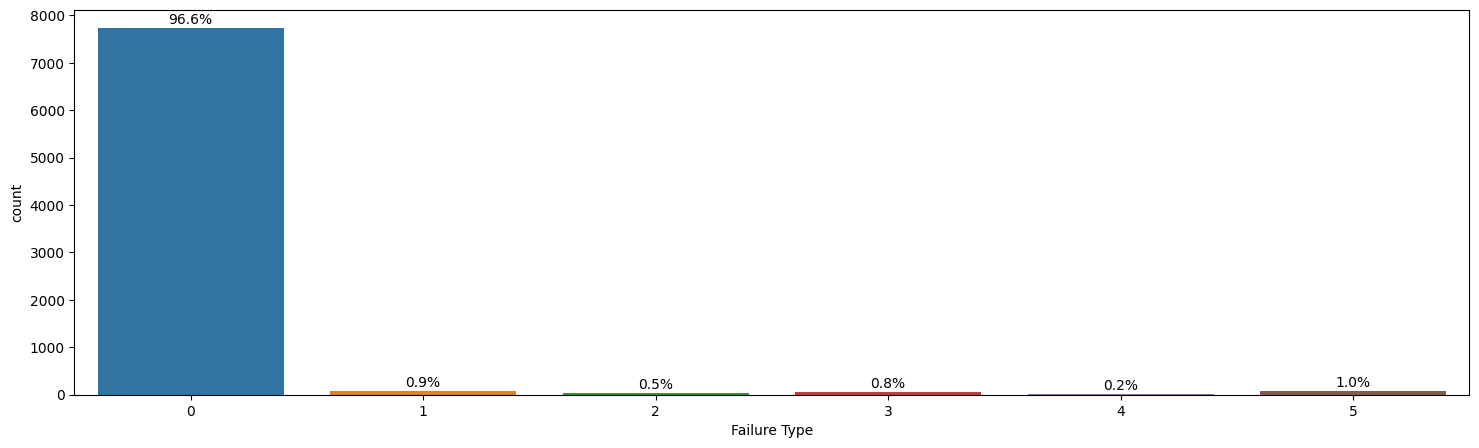

In [16]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

Machine Learning

Training Accuracy    : 96.71 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.57      0.25      0.35        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.26      0.21      0.22      2000
weighted avg       0.93      0.96      0.94      2000

--------------------------------------------------------


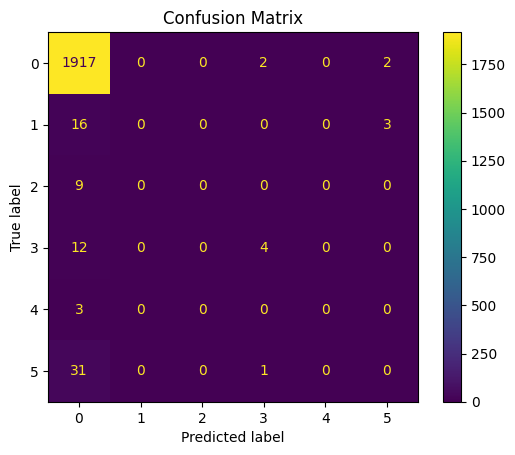

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
# plot_confusion_matrix(logreg, X_test, y_test);





cm = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logreg.classes_)



# clf = SVC(random_state=0)
# clf.fit(X_train, y_train)
# SVC(random_state=0)
# predictions = clf.predict(X_test)


# cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                display_labels=clf.classes_)
disp.plot()



plt.title('Confusion Matrix');

In [18]:
prediction1 = logreg.predict(X_test)
print(prediction1)

[0 0 0 ... 0 0 0]


Actual v/s Predicted

In [19]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
4858,0,0
7443,0,0
2963,0,0
6087,0,0
6676,0,0


In [20]:

joblib.dump(logreg, 'models/logreg.joblib')

['models/logreg.joblib']

In [21]:

# Save models
# %%
joblib.dump(logreg, 'models/logreg.joblib')
joblib.dump(encoder, 'models/label_encoder.joblib')

['models/label_encoder.joblib']

In [22]:
# Inference Function
def load(model_path, label_encoder_path):
    
    model = joblib.load(model_path)
    le = joblib.load(label_encoder_path)
    return model, le

def inference(row, model, label_encoder, feat_cols):
    # Create a DataFrame for the input row
    df = pd.DataFrame([row], columns=feat_cols)
    display(df)

    prediction = model.predict(df)

    print(f"prediction {prediction}")
    print(f"prediction {prediction[0]}")
    # Decode the prediction
    return prediction[0]

In [23]:
X

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,10.5
1,2,26.05,36.55,1408,46.3,3,10.5
2,2,25.95,36.35,1498,49.4,5,10.4
3,2,26.05,36.45,1433,39.5,7,10.4
4,2,26.05,36.55,1408,40.0,9,10.5
...,...,...,...,...,...,...,...
9995,1,26.65,36.25,1604,29.5,14,9.6
9996,3,26.75,36.25,1632,31.8,17,9.5
9997,1,26.85,36.45,1645,33.4,22,9.6
9998,3,26.85,36.55,1408,48.5,25,9.7


In [24]:

# Example feature columns and a row for inference
feat_cols = ['Type', 'Air temperature [°C]', 'Process temperature [°C]',
             'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
             'Temperature difference [°C]']

row = [1, 25, 35, 1550, 42, 0, 10]

# Load models and perform inference
# sc, model, le = load('models/scaler.joblib', 'models/logreg.joblib', 'models/label_encoder.joblib')

model, le = load('models/logreg.joblib',  'models/label_encoder.joblib')


In [25]:
le

OrdinalEncoder(cols=['Type', 'Failure Type'],
               mapping=[{'col': 'Type', 'data_type': dtype('O'),
                         'mapping': M      1
L      2
H      3
NaN   -2
dtype: int64},
                        {'col': 'Failure Type', 'data_type': dtype('O'),
                         'mapping': No Failure                  1
Power Failure               2
Tool Wear Failure           3
Overstrain Failure          4
Random Failures             5
Heat Dissipation Failure    6
NaN                        -2
dtype: int64}])

In [26]:
result = inference(row, model, le, feat_cols)
print("Inference Result:", result)


,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [°C]
0,1,25,35,1550,42,0,10


prediction [0]
prediction 0
Inference Result: 0


In [27]:

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [28]:

 import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

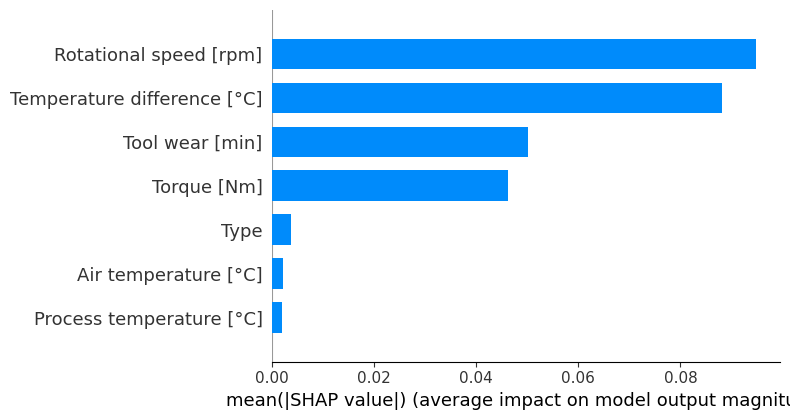

In [29]:

shap_values = shap.TreeExplainer(model_rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

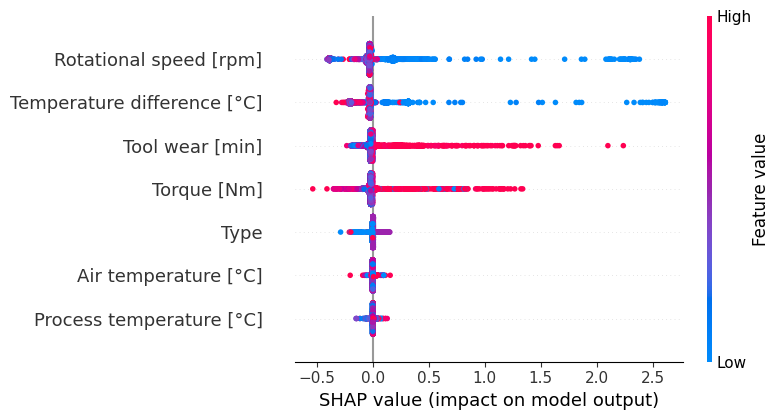

In [30]:
shap.summary_plot(shap_values, X_train)